In [1]:
import umap
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from scipy import cluster, spatial, stats
#from dynamicTreeCut import cutreeHybrid, dynamicTreeCut
import seaborn as sns
import networkx as nx
import phenograph
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_predict
import os
import json
from scipy.stats import wasserstein_distance
from pyemd import emd, emd_with_flow
import os
import dash
import pandas as pd
from dashdataframe import configure_app
from nglui.statebuilder import *
import annotationframeworkclient
from annotationframeworkclient import imagery
import random

#Finished

/conda/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


In [2]:
distancetype = 'PSSEuclidean' ##'EarthMovers_%dbins'%numbins
distancetype = 'EarthMovers_16bins'

In [3]:


def distmatfunc(i,j):
    
    DM_E = myobj['Euclidean']
    DM_D = myobj['Depth_Matrix']
    #DM_W = myobj[distancetype]
    #DM_W = myobj['EarthMovers_%dbins'%numbins]
    DM_W = mymatrix
    
    i = int(i[0]) 
    j = int(j[0]) 
    return facE*DM_E[i,j] + facD*DM_D[i,j] + facW*DM_W[i,j]


def create_random_colors(numcolors):
    allcolors = []
    for i in range(0, numcolors):
        clr = [ round(random.uniform(0, 1),1),round(random.uniform(0, 1),1),round(random.uniform(0, 1),1)]
        allcolors.append(clr)
        
        
    return allcolors
    


In [ ]:
#load

TOTALS = []
WRONGINH = []
WRONGEX = []
WEIGHTS = []
NB = []
for numbins in range(1,17):
    myobj = pickle.load( open( "Precalculated_Fixed_Matrices_16bins_normalized.p", "rb" ) )
    vecM = np.zeros((myobj['neuron_df'].shape[0],1)) 
    for i in range(0, myobj['neuron_df'].shape[0]): 
        vecM[i,0] = i 
    print (myobj[distancetype].shape)
    mymatrix = np.sum(myobj[distancetype][:,:,:numbins],axis=2)
    
    #PHENOGRAPH CLUSTERING

    facE = 1 # soma 
    facD = 1
    #facD = np.mean(myobj['Euclidean'])/np.mean(myobj['Depth_Matrix']) # y
    facW = np.mean(myobj['Euclidean'])/np.mean(mymatrix)# pss
    #facW = 50# pss
    
    df_drop = myobj['neuron_df']
    phenograph_ks = [12]
    fac =  0.1
    for pk in phenograph_ks:
        communities, graph, Q = phenograph.cluster(vecM, k=pk,primary_metric=distmatfunc)
        ct = communities
        nclusters = np.max(ct)+1
        ncolors=nclusters
        print(Q, nclusters)
        np.unique(communities)
        df_drop.loc[:, 'phenograph_cluster_%d'%pk]=ct
        print(communities)

    df_drop.loc[:, 'phenograph_cluster']=ct
    
    #CREATE NEW TAG
    dec = (df_drop.Tags_both=='unsure')*2.0 + (df_drop.Tags_both=='excitatory')*1.0
    df_drop['NEWTag'] = dec
    
    #CALCULATE WRONG ONES
    wronginh = 0
    wrongex = 0
    for u in np.unique(df_drop['phenograph_cluster']):
        cluster = list(df_drop[df_drop['phenograph_cluster']==u]['NEWTag'].values)
        d = {x:cluster.count(x) for x in cluster}
        1.0 in d.keys()
        if (1.0 in d.keys()) & (0.0 in d.keys()) :
            if d[1.0]  > d[0.0] :
                wronginh += d[0.0]
            if d[0.0]  > d[1.0]:
                wrongex += d[1.0]
    WEIGHTS.append(facW)
    WRONGINH.append(wronginh)
    WRONGEX.append(wrongex)
    TOTALS.append(wronginh+wrongex)
    NB.append(numbins)
    print("Wrong IN: %d, Wrong EX: %d, Wrong Total: %d"%(wronginh, wrongex, wronginh+wrongex))
    print("Weight = ", facW)



In [ ]:
%matplotlib notebook
fig = plt.figure()
plt.plot(NB, TOTALS)

In [ ]:
#PREVIOUS NUMBERS FROM K = 12: [14, 11, 10, 9, 17, 18, 23, 38, 34, 43, 44, 43, 45, 45, 37]
#PREVIOUS NUMBERS FROM K = 24: [14, 12, 10, 12, 22, 33, 41, 41, 42, 42, 43, 43, 44, 44, 43]

# PSSEuclidean, k = 12: [43, 17, 11, 12, 12, 21, 19, 27, 35, 29, 34, 33, 34, 34, 34, 36]
# EarthMovers,  k = 12: [50, 33, 13, 11, 14, 19, 21, 20, 24, 24, 23, 23, 22, 18, 19, 19]
TOTALS

In [ ]:
%matplotlib notebook
fig = plt.figure()
plt.imshow(np.sum(myobj[distancetype][:,:,:1],axis=2))


<IPython.core.display.Javascript object>


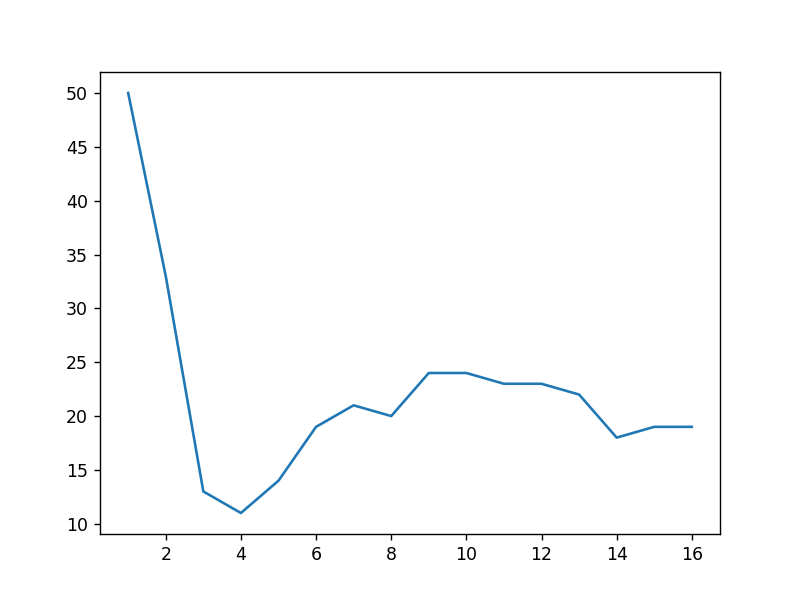

[50, 33, 13, 11, 14, 19, 21, 20, 24, 24, 23, 23, 22, 18, 19, 19]

In [6]:
%matplotlib notebook
fig = plt.figure()
TOTALS = [50, 33, 13, 11, 14, 19, 21, 20, 24, 24, 23, 23, 22, 18, 19, 19]
plt.plot(range(1,17), TOTALS)
TOTALS

<IPython.core.display.Javascript object>


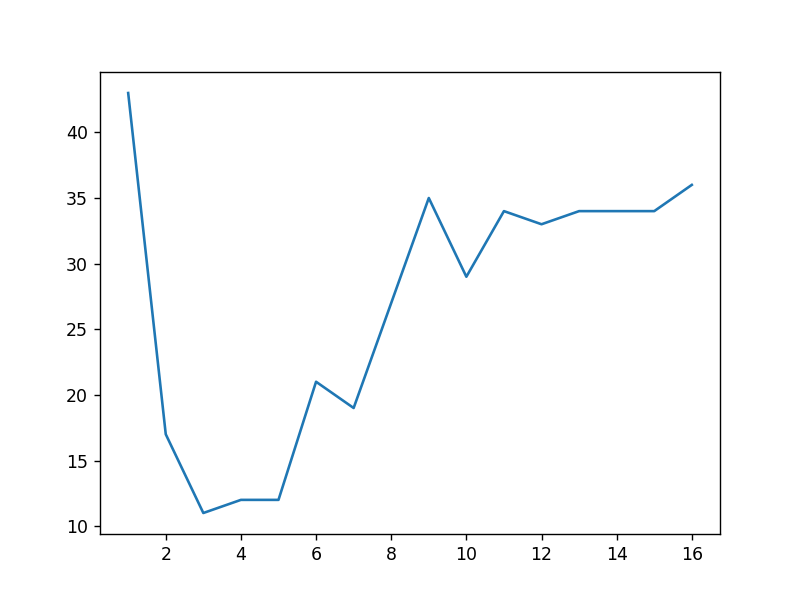

[43, 17, 11, 12, 12, 21, 19, 27, 35, 29, 34, 33, 34, 34, 34, 36]

In [7]:

%matplotlib notebook
fig = plt.figure()
TOTALS = [43, 17, 11, 12, 12, 21, 19, 27, 35, 29, 34, 33, 34, 34, 34, 36]
plt.plot(range(1,17), TOTALS)
TOTALS
